# Exploring Pandas' features throught the TED Talks dataset

In this tutorial, we will use the [TED Talks dataset](https://www.kaggle.com/rounakbanik/ted-talks), available from Kaggle Datasets under the [CC BY-NC-SA 4.0 license](https://creativecommons.org/licenses/by-nc-sa/4.0/).

This tutorial is partially based on the [Data Science Best Practices with pandas](https://github.com/justmarkham/pycon-2019-tutorial) tutorial presented by Kevin Markham at PyCon2019 on May 2, 2019.

## Import the required libraries

In [91]:
import pandas as pd
import matplotlib.pyplot as plt

Sometimes you need to know the pandas version you are using, for example, when you need to consult the pandas documentation. You get the pandas version with:

In [92]:
pd.__version__

'1.1.3'

## Load and examine the TED talks dataset

In [93]:
ted = pd.read_csv('data/ted.csv')
ted.head()

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [94]:
ted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2550 entries, 0 to 2549
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   comments            2550 non-null   int64 
 1   description         2550 non-null   object
 2   duration            2550 non-null   int64 
 3   event               2550 non-null   object
 4   film_date           2550 non-null   int64 
 5   languages           2550 non-null   int64 
 6   main_speaker        2550 non-null   object
 7   name                2550 non-null   object
 8   num_speaker         2550 non-null   int64 
 9   published_date      2550 non-null   int64 
 10  ratings             2550 non-null   object
 11  related_talks       2550 non-null   object
 12  speaker_occupation  2544 non-null   object
 13  tags                2550 non-null   object
 14  title               2550 non-null   object
 15  url                 2550 non-null   object
 16  views               2550

### Check for the presence of missing values

In [95]:
ted.isna().sum()

comments              0
description           0
duration              0
event                 0
film_date             0
languages             0
main_speaker          0
name                  0
num_speaker           0
published_date        0
ratings               0
related_talks         0
speaker_occupation    6
tags                  0
title                 0
url                   0
views                 0
dtype: int64

Let's identify who are the speakers with missing occupation and if we can identify their occupation from other records (in case they gave more than one talk)

In [96]:
no_occupation_speakers = ted.loc[ted.speaker_occupation.isna(),'main_speaker']
no_occupation_speakers

1113      Sonaar Luthra
1192     Rick Falkvinge
1220        Gary Kovacs
1656      Ryan Holladay
1911      Brian Dettmer
1949    Boniface Mwangi
Name: main_speaker, dtype: object

Compute the number of observations (talks) per each speaker

In [97]:
ted.main_speaker.value_counts()

Hans Rosling       9
Juan Enriquez      7
Rives              6
Marco Tempest      6
Julian Treasure    5
                  ..
Casey Brown        1
 Sofi Tukker       1
Newton Aduaka      1
Al Seckel          1
Nate Silver        1
Name: main_speaker, Length: 2156, dtype: int64

Among all speakers, select those with the missing occupation

In [98]:
ted.main_speaker.value_counts()[no_occupation_speakers.values]

Sonaar Luthra      1
Rick Falkvinge     1
Gary Kovacs        1
Ryan Holladay      1
Brian Dettmer      1
Boniface Mwangi    1
Name: main_speaker, dtype: int64

Unfortunately, there are no additional records that could be used to fill the missing occupation values.

### Transform filming date and publication date into datetime columns

Examine a sample of film_date and published_date values

In [99]:
ted.loc[:,['film_date', 'published_date']].sample(5)

,film_date,published_date
432,1233878400,1240362000
1903,1413331200,1422288314
240,1046649600,1213563480
1148,1321660800,1329576848
2342,1466208000,1481299843


Note that both dates are given as *Unix epoch time*, that is, the number of seconds that have elapsed since January 1, 1970. 

For more about epoch time, see: https://www.epochconverter.com/

Let's start by transforming the film_date into the datetime type

In [100]:
ted['filming_date'] = pd.to_datetime(ted['film_date'], unit='s')

In [101]:
ted.filming_date.head()

0   2006-02-25
1   2006-02-25
2   2006-02-24
3   2006-02-26
4   2006-02-22
Name: filming_date, dtype: datetime64[ns]

Then, do the same for the published_date

In [102]:
ted['publication_date'] = pd.to_datetime(ted['published_date'], unit='s')

In [103]:
ted.sample(5)

,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,filming_date,publication_date
173,71,Investor and prankster Yossi Vardi delivers a ...,375,TED2007,1173225600,28,Yossi Vardi,Yossi Vardi: We're worried about local warming...,1,1199422800,"[{'id': 7, 'name': 'Funny', 'count': 1452}, {'...","[{'id': 148, 'hero': 'https://pe.tedcdn.com/im...",Investor,"['comedy', 'humor']",We're worried about local warming ... in your lap,https://www.ted.com/talks/yossi_vardi_fights_l...,933311,2007-03-07,2008-01-04 05:00:00
985,440,Plenty of robots can fly -- but none can fly l...,379,TEDGlobal 2011,1310688000,45,Markus Fischer,Markus Fischer: A robot that flies like a bird,1,1311344765,"[{'id': 23, 'name': 'Jaw-dropping', 'count': 1...","[{'id': 195, 'hero': 'https://pe.tedcdn.com/im...",Designer,"['animals', 'biomechanics', 'biomimicry', 'des...",A robot that flies like a bird,https://www.ted.com/talks/a_robot_that_flies_l...,6264902,2011-07-15,2011-07-22 14:26:05
1772,147,"In 1991, Shaka Senghor shot and killed a man. ...",720,TED2014,1395273600,26,Shaka Senghor,Shaka Senghor: Why your worst deeds don’t defi...,1,1403535445,"[{'id': 3, 'name': 'Courageous', 'count': 635}...","[{'id': 1286, 'hero': 'https://pe.tedcdn.com/i...",Author,"['crime', 'culture', 'prison']",Why your worst deeds don’t define you,https://www.ted.com/talks/shaka_senghor_why_yo...,1439616,2014-03-20,2014-06-23 14:57:25
2262,43,"Summer, 2016: amid populist revolts, clashing ...",997,TEDSummit,1467158400,21,Anand Giridharadas,Anand Giridharadas: A letter to all who have l...,1,1471532545,"[{'id': 1, 'name': 'Beautiful', 'count': 206},...","[{'id': 2219, 'hero': 'https://pe.tedcdn.com/i...",Writer,"['collaboration', 'communication', 'community'...",A letter to all who have lost in this era,https://www.ted.com/talks/anand_giridharadas_a...,961913,2016-06-29,2016-08-18 15:02:25
1952,98,"With humor and charm, mathematician Eduardo Sá...",581,TEDxRiodelaPlata,1412121600,24,Eduardo Sáenz de Cabezón,Eduardo Sáenz de Cabezón: Math is forever,1,1428421985,"[{'id': 8, 'name': 'Informative', 'count': 349...","[{'id': 1811, 'hero': 'https://pe.tedcdn.com/i...",Math educator,"['TED en Español', 'TEDx', 'humor', 'math', 's...",Math is forever,https://www.ted.com/talks/eduardo_saenz_de_cab...,1610293,2014-10-01,2015-04-07 15:53:05


### Drop columns that are no longer needed

In [104]:
ted.drop(columns=['film_date', 'published_date'], inplace=True)

In [105]:
ted.columns

Index(['comments', 'description', 'duration', 'event', 'languages',
       'main_speaker', 'name', 'num_speaker', 'ratings', 'related_talks',
       'speaker_occupation', 'tags', 'title', 'url', 'views', 'filming_date',
       'publication_date'],
      dtype='object')

### How to change columns' names? 

The most flexible method for renaming columns is the `rename()` method. One should pass it a dictionary in which the keys are the old column names, while the values are the new names, and specify the axis to be 'columns'.

For example, rename columns 'comments' and 'views' to 'comment_count' and 'view_count', respectively

In [106]:
ted = ted.rename({'comments':'comment_count', 'views':'view_count'}, axis='columns')

In [107]:
ted.columns

Index(['comment_count', 'description', 'duration', 'event', 'languages',
       'main_speaker', 'name', 'num_speaker', 'ratings', 'related_talks',
       'speaker_occupation', 'tags', 'title', 'url', 'view_count',
       'filming_date', 'publication_date'],
      dtype='object')

In case you may need that, you can get column names as a list, as follows:

In [108]:
ted.columns.values.tolist()

['comment_count',
 'description',
 'duration',
 'event',
 'languages',
 'main_speaker',
 'name',
 'num_speaker',
 'ratings',
 'related_talks',
 'speaker_occupation',
 'tags',
 'title',
 'url',
 'view_count',
 'filming_date',
 'publication_date']

## Task 1: Compute and plot the number of talks that took place each year

To do this, we need to extract the year from the filming date, and group talks on the year basis.

First, add the event_year column

In [109]:
ted['event_year'] = ted['filming_date'].dt.year
ted.event_year.head()

0    2006
1    2006
2    2006
3    2006
4    2006
Name: event_year, dtype: int64

Then, compute the number of talks per year

In [110]:
ted.event_year.value_counts()

2013    270
2011    270
2010    267
2012    267
2016    246
2015    239
2014    237
2009    232
2007    114
2017     98
2008     84
2005     66
2006     50
2003     33
2004     33
2002     27
1998      6
2001      5
1983      1
1991      1
1994      1
1990      1
1984      1
1972      1
Name: event_year, dtype: int64

Note that the counts are by default sorted in descending order of count value. This is fine if we are interested in identifying years with the highest / lowest number of talks. <br>
However, if we want to plot the number of talks per year, we need the talk counts ordered based on the year. To get that, we can do the sort based on the index:

In [111]:
talks_per_year = ted.event_year.value_counts()
talks_per_year.sort_index(inplace=True)

In [112]:
talks_per_year

1972      1
1983      1
1984      1
1990      1
1991      1
1994      1
1998      6
2001      5
2002     27
2003     33
2004     33
2005     66
2006     50
2007    114
2008     84
2009    232
2010    267
2011    270
2012    267
2013    270
2014    237
2015    239
2016    246
2017     98
Name: event_year, dtype: int64

Now, we can plot talk counts across years

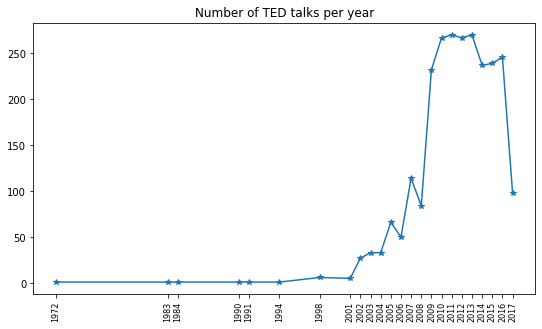

In [113]:
plt.figure(figsize=(9,5))
plt.plot(talks_per_year.index, talks_per_year.values, marker='*')
plt.xticks(talks_per_year.index, rotation='vertical', size=8)
plt.title("Number of TED talks per year")
plt.show()

## Task 2: Which TED events attracted the most attention?

Consider the number of views as a proxy of an event's attractiveness

In [114]:
ted.head(4)

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,speaker_occupation,tags,title,url,view_count,filming_date,publication_date,event_year
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27 00:11:00,2006
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27 00:11:00,2006
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27 00:11:00,2006
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,2006-02-26,2006-06-27 00:11:00,2006


Compute average number of views per talk during each event

In [115]:
ted.groupby('event').view_count.mean().sort_values(ascending=False)

event
TEDxPuget Sound           34309432.0
TEDxHouston               16140250.5
TEDxBloomington            9484259.5
TEDxCreativeCoast          8444981.0
TEDxNorrkoping             6569493.0
                             ...    
TEDxNASA@SiliconValley      155895.0
AORN Congress               149818.0
TEDxWaterloo                138812.0
TEDxIslay                   120274.0
The Do Lectures             112321.0
Name: view_count, Length: 355, dtype: float64

It might be the case that some of these events got high mean views due to having a small number of very popular talks, or even just one very popular talk. So, consider also the number of talks at each event.

To aggregate data based on more than one function (e.g., in this case, mean and count), we can follow `groupby()` with the `agg()` function that receives a list of aggregation functions we want to apply to the grouped data.

In [116]:
ted.groupby('event').view_count.agg(['count', 'mean']).head()

,count,mean
event,,
AORN Congress,1,149818.0
Arbejdsglaede Live,1,971594.0
BBC TV,1,521974.0
Bowery Poetry Club,1,676741.0
Business Innovation Factory,3,304086.0


Let's store the results in a new data frame

In [117]:
events_views = ted.groupby('event').view_count.agg(['count', 'mean'])

In [118]:
events_views.columns = ['talk_count', 'mean_views']

Now, we can examine, for each event, both the average number of views and number of talks

In [119]:
events_views.sort_values(by='mean_views', ascending=False).head(10)

,talk_count,mean_views
event,,
TEDxPuget Sound,1,34309432.0
TEDxHouston,2,16140250.5
TEDxBloomington,2,9484259.5
TEDxCreativeCoast,1,8444981.0
TEDxNorrkoping,1,6569493.0
TEDxUW,1,5917201.0
TEDxLinnaeusUniversity,1,4984884.0
TEDxGoldenGatePark 2012,1,4811180.0
TEDxCHUV,1,4682458.0


Note that all top 10 events (based on the average views) had at most 2 talks. <br>
Let's check the stats for the number of talks and mean views per event

In [120]:
events_views.describe()

,talk_count,mean_views
count,355.000000,3.550000e+02
mean,7.183099,1.527689e+06
std,15.265735,2.205832e+06
min,1.000000,1.123210e+05
25%,1.000000,7.594215e+05
50%,2.000000,1.187105e+06
75%,5.000000,1.715774e+06
max,84.000000,3.430943e+07


To get some further insights, let's consider only those events with above average number of talks. Considering highly skewed distribution, we'll use median as the average value

In [121]:
avg_talk_cnt = events_views.describe().loc['50%', 'talk_count']

In [122]:
events_views.loc[events_views.talk_count > avg_talk_cnt, :].sort_values(by='mean_views', ascending=False)

,talk_count,mean_views
event,,
TED Talks Education,8,4.375104e+06
TEDGlobal>Geneva,11,3.385408e+06
TED2006,45,3.274345e+06
TEDxManhattanBeach,3,3.251704e+06
TEDSalon NY2013,11,2.861639e+06
...,...,...
TEDxYYC,3,3.699607e+05
Business Innovation Factory,3,3.040860e+05
TEDxPhoenix,4,2.846855e+05


## Task 3: Explore talks based on their ratings

Take a closer look at a sample of ratings

In [123]:
ted.ratings.sample(5)

2217    [{'id': 26, 'name': 'Obnoxious', 'count': 23},...
1026    [{'id': 1, 'name': 'Beautiful', 'count': 251},...
607     [{'id': 26, 'name': 'Obnoxious', 'count': 18},...
426     [{'id': 23, 'name': 'Jaw-dropping', 'count': 3...
817     [{'id': 21, 'name': 'Unconvincing', 'count': 1...
Name: ratings, dtype: object

In [124]:
ted.ratings[0]

"[{'id': 7, 'name': 'Funny', 'count': 19645}, {'id': 1, 'name': 'Beautiful', 'count': 4573}, {'id': 9, 'name': 'Ingenious', 'count': 6073}, {'id': 3, 'name': 'Courageous', 'count': 3253}, {'id': 11, 'name': 'Longwinded', 'count': 387}, {'id': 2, 'name': 'Confusing', 'count': 242}, {'id': 8, 'name': 'Informative', 'count': 7346}, {'id': 22, 'name': 'Fascinating', 'count': 10581}, {'id': 21, 'name': 'Unconvincing', 'count': 300}, {'id': 24, 'name': 'Persuasive', 'count': 10704}, {'id': 23, 'name': 'Jaw-dropping', 'count': 4439}, {'id': 25, 'name': 'OK', 'count': 1174}, {'id': 26, 'name': 'Obnoxious', 'count': 209}, {'id': 10, 'name': 'Inspiring', 'count': 24924}]"

Even though a 'ratings' value looks like a list, it is not

In [125]:
type(ted.ratings[0])

str

To convert talk ratings into a list - so that they can be further processed - we will use a function from the Python's `ast` (*Abstract Syntax Tree*) module:

`literal_eval()` function allows one to evaluate a string containing a Python literal or container, that is, it can be used to transform a string into a literal value, a list, a tuple or any other container object

In [126]:
import ast

ast.literal_eval('(1,2,3,4)')

(1, 2, 3, 4)

In [127]:
ast.literal_eval(ted.ratings[0])

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

In [128]:
type(ast.literal_eval(ted.ratings[0]))

list

Create a new column for storing ratings as a list, instead of a string.

To that end, we will use the `apply()` f. to apply the `ast.literal_eval()` f. to each value of the ratings column

In [129]:
ted['ratings_list'] = ted.ratings.apply(ast.literal_eval)

In [130]:
ted.ratings_list.head(3)

0    [{'id': 7, 'name': 'Funny', 'count': 19645}, {...
1    [{'id': 7, 'name': 'Funny', 'count': 544}, {'i...
2    [{'id': 7, 'name': 'Funny', 'count': 964}, {'i...
Name: ratings_list, dtype: object

### Task 3.1: For each talk, find the 3 most frequent ratings

Add a column with a tuple comprising names of the 3 most frequent ratings for the corresponding talk

To do this, we can start from the 'ratings_list' column

In [131]:
ted.ratings_list[0]

[{'id': 7, 'name': 'Funny', 'count': 19645},
 {'id': 1, 'name': 'Beautiful', 'count': 4573},
 {'id': 9, 'name': 'Ingenious', 'count': 6073},
 {'id': 3, 'name': 'Courageous', 'count': 3253},
 {'id': 11, 'name': 'Longwinded', 'count': 387},
 {'id': 2, 'name': 'Confusing', 'count': 242},
 {'id': 8, 'name': 'Informative', 'count': 7346},
 {'id': 22, 'name': 'Fascinating', 'count': 10581},
 {'id': 21, 'name': 'Unconvincing', 'count': 300},
 {'id': 24, 'name': 'Persuasive', 'count': 10704},
 {'id': 23, 'name': 'Jaw-dropping', 'count': 4439},
 {'id': 25, 'name': 'OK', 'count': 1174},
 {'id': 26, 'name': 'Obnoxious', 'count': 209},
 {'id': 10, 'name': 'Inspiring', 'count': 24924}]

One way to approach this task is to create a function that receives a list of ratings for one talk and returns a tuple with the 3 most frequent ratings

In [132]:
def most_freq_ratings(ratings):
    sorted_ratings = sorted(ratings, key=lambda rating: rating['count'], reverse=True)
    return tuple([rating['name'] for rating in sorted_ratings[:3]])

In [133]:
most_freq_ratings(ted.ratings_list[0])

('Inspiring', 'Funny', 'Persuasive')

Now, apply the function to the ratings_list of each talk to create a new column (e.g. top3_ratings)

In [134]:
ted['top3_ratings'] = ted.ratings_list.apply(most_freq_ratings)

Print 'top3_ratings' of the 10 most viewed talks to see what were the primary ways of ratings those talks

In [135]:
ted.sort_values(by='view_count', ascending=False)['top3_ratings'].head(10)

0               (Inspiring, Funny, Persuasive)
1346     (Inspiring, Fascinating, Informative)
677       (Inspiring, Persuasive, Fascinating)
837         (Inspiring, Courageous, Beautiful)
452          (Funny, Informative, Fascinating)
1776      (Informative, Inspiring, Persuasive)
201     (Inspiring, Fascinating, Jaw-dropping)
5         (Inspiring, Persuasive, Fascinating)
2114           (Funny, Ingenious, Fascinating)
1416      (Courageous, Inspiring, Informative)
Name: top3_ratings, dtype: object

### Task 3.2 Which TED events had the most 'Jaw-dropping' talks?

This task can be interpreted in different ways. One way is that we qualify a talk as *jaw-dropping* if 'Jaw dropping' ratings were among the top 3 most frequent kind of ratings for that talk.

Let's start by taking a subset of talks that are *jaw-dropping*, as qualified above

In [136]:
is_jaw_dropping = lambda ratings: 'Jaw-dropping' in ratings

jaw_dropping_talks = ted.loc[ted.top3_ratings.apply(is_jaw_dropping)]

Note the selection based on a condition expressed as a function of column (top3_ratings) values

Take a sample of jaw dropping talks and check that 'Jaw-dropping' is really among the top 3 ratings

In [137]:
jaw_dropping_talks.top3_ratings.sample(5)

401       (Jaw-dropping, Fascinating, Ingenious)
539       (Fascinating, Ingenious, Jaw-dropping)
15          (Jaw-dropping, Beautiful, Inspiring)
341     (Fascinating, Informative, Jaw-dropping)
2068     (Courageous, Informative, Jaw-dropping)
Name: top3_ratings, dtype: object

To answer the posed question, we can now simply compute the number of talks per event in the newly created data frame with jaw dropping talks

In [138]:
jaw_dropping_talks.event.value_counts()

TED2007                   17
TED2009                   16
TED2013                   14
TED2008                   11
TED2011                   10
                          ..
TEDWomen 2016              1
TEDGlobal>London           1
TEDxAustin                 1
TEDxHousesOfParliament     1
TEDxUMKC                   1
Name: event, Length: 67, dtype: int64

### Task 3.3 Compute the number of positive, negative, and neutral ratings, then add one column for each of these counts

This practically means that we should add 3 columns - pos_ratings, neg_ratings, neutral_ratings - with the corresponding rating counts.

We will achieve this through a multistep process:

1) Identify different kinds of rating categories that have been used to characterise talks and classify them as positive, negative, or neutral

2) Create a function for computing the number of ratings in each of the 3 classes (positive, negative, neutral)

3) Add a column - ratings_counts - storing the computed values as tuples of the form (pos_ratings, neg_ratings, neutral_ratings)

4) Transform the ratings_counts column into 3 columns: pos_ratings, neg_ratings, neutral_ratings 

**Step 1.1**: Identify different kinds of rating categories for each talk and store them as a list in a new, auxiliary column (e.g. rating_categories)

In [139]:
get_rating_categories = lambda ratings: [r['name'] for r in ratings]

ted['rating_categories'] = ted.ratings_list.apply(get_rating_categories)
ted.rating_categories.head()

0    [Funny, Beautiful, Ingenious, Courageous, Long...
1    [Funny, Courageous, Confusing, Beautiful, Unco...
2    [Funny, Courageous, Ingenious, Beautiful, Unco...
3    [Courageous, Beautiful, Confusing, Funny, Inge...
4    [Ingenious, Funny, Beautiful, Courageous, Long...
Name: rating_categories, dtype: object

Next, we need to identify unique rating categories across the categories lists of all the talks

In [140]:
rating_categories_set = set()
for rcategoires in ted.rating_categories:
    rating_categories_set.update(rcategoires) # update allows for adding multiple elements to a set at once

rating_categories_set

{'Beautiful',
 'Confusing',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Longwinded',
 'OK',
 'Obnoxious',
 'Persuasive',
 'Unconvincing'}

**Step 1.2**: Classify rating categories as positive, negative, or neutral

In [141]:
negative = {'Confusing','Longwinded', 'Obnoxious', 'Unconvincing'}
neutral = {'OK'}
positive = rating_categories_set - (negative | neutral)

In [142]:
positive

{'Beautiful',
 'Courageous',
 'Fascinating',
 'Funny',
 'Informative',
 'Ingenious',
 'Inspiring',
 'Jaw-dropping',
 'Persuasive'}

**Step 2**: Create a function that computes the number of ratings in each of the 3 classes (positive, negative, neutral)

In [143]:
def pos_neg_neutral_ratings_count(ratings):
    pos_cnt = neg_cnt = neutral_cnt = 0
    for rating in ratings:
        if rating['name'] in negative:
            neg_cnt += rating['count']
        elif rating['name'] in neutral:
            neutral_cnt += rating['count']
        else:
            pos_cnt += rating['count']
    return pos_cnt, neg_cnt, neutral_cnt

In [144]:
pos_neg_neutral_ratings_count(ted.ratings_list[0])

(91538, 1138, 1174)

**Step 3**: Add a column - *ratings_counts* - storing the output of the `pos_neg_neutral_ratings_count()` function applied to the *ratings_list* column

In [145]:
ted['ratings_counts'] = ted.ratings_list.apply(pos_neg_neutral_ratings_count)

In [146]:
ted.head(3)

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,...,title,url,view_count,filming_date,publication_date,event_year,ratings_list,top3_ratings,rating_categories,ratings_counts
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",...,Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","(Inspiring, Funny, Persuasive)","[Funny, Beautiful, Ingenious, Courageous, Long...","(91538, 1138, 1174)"
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",...,Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Confusing, Beautiful, Unco...","(2169, 564, 203)"
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",...,Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,2006-02-24,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Ingenious, Beautiful, Unco...","(2327, 351, 146)"


**Step 4.1**: Transform the *ratings_counts* column into a data frame with 3 columns: pos_ratings, neg_ratings, neutral_ratings

To that end, we can `apply()` the Series constructor on the *ratings_counts* column

In [147]:
ted_ratings = ted.ratings_counts.apply(pd.Series)
ted_ratings.head()

,0,1,2
0,91538,1138,1174
1,2169,564,203
2,2327,351,146
3,3487,156,85
4,25062,310,248


In [148]:
ted_ratings.columns = ['pos_ratings', 'neg_ratings', 'neutral_ratings']
ted_ratings.head()

,pos_ratings,neg_ratings,neutral_ratings
0,91538,1138,1174
1,2169,564,203
2,2327,351,146
3,3487,156,85
4,25062,310,248


**Step 4.2**: Merge this new data frame with the original one (ted); this can be done using the `concat()` function. The auxiliary column - ratings_counts - can be dropped as it is no longer needed

In [149]:
ted.drop(columns='ratings_counts', inplace=True)

In [150]:
ted = pd.concat([ted, ted_ratings], axis=1)

In [151]:
ted.head()

,comment_count,description,duration,event,languages,main_speaker,name,num_speaker,ratings,related_talks,...,view_count,filming_date,publication_date,event_year,ratings_list,top3_ratings,rating_categories,pos_ratings,neg_ratings,neutral_ratings
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",...,47227110,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","(Inspiring, Funny, Persuasive)","[Funny, Beautiful, Ingenious, Courageous, Long...",91538,1138,1174
1,265,With the same humor and humanity he exuded in ...,977,TED2006,43,Al Gore,Al Gore: Averting the climate crisis,1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",...,3200520,2006-02-25,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Confusing, Beautiful, Unco...",2169,564,203
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,26,David Pogue,David Pogue: Simplicity sells,1,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",...,1636292,2006-02-24,2006-06-27 00:11:00,2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","(Funny, Informative, Inspiring)","[Funny, Courageous, Ingenious, Beautiful, Unco...",2327,351,146
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",...,1697550,2006-02-26,2006-06-27 00:11:00,2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","(Inspiring, Courageous, Persuasive)","[Courageous, Beautiful, Confusing, Funny, Inge...",3487,156,85
4,593,You've never seen data presented like this. Wi...,1190,TED2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",...,12005869,2006-02-22,2006-06-27 20:38:00,2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","(Informative, Fascinating, Jaw-dropping)","[Ingenious, Funny, Beautiful, Courageous, Long...",25062,310,248


### Task 3.4 Find speakers with the highest average number of positive ratings per talk

We need to group talks based on the 'main_speaker' column and, for each group, compute mean value of the pos_ratings column

In [152]:
avg_pos_rating_per_speaker = ted.groupby('main_speaker').pos_ratings.mean()

In [153]:
avg_pos_rating_per_speaker.sort_values(ascending=False).head(10)

main_speaker
Jill Bolte Taylor    68436.00
Amy Cuddy            63814.00
Steve Jobs           36664.00
Brené Brown          36572.00
Simon Sinek          34960.00
Ken Robinson         32784.25
Shawn Achor          31692.00
Susan Cain           29095.00
Pranav Mistry        26292.00
Guy Winch            24204.00
Name: pos_ratings, dtype: float64

To answer this more thoroughly, we'll consider also the number of talks that a speaker gave

In [154]:
avg_pos_rating_per_speaker = ted.groupby('main_speaker').pos_ratings.agg(['mean', 'count'])
avg_pos_rating_per_speaker.head(7)

,mean,count
main_speaker,,
OK Go,1361.0,1
Rodrigo y Gabriela,1103.0,1
Silk Road Ensemble,149.0,1
Sofi Tukker,135.0,1
AJ Jacobs,1705.0,3
Aakash Odedra,752.0,1
Aala El-Khani,690.0,1


In [155]:
avg_pos_rating_per_speaker.columns = ['avg_pos_rating', 'talk_count']
avg_pos_rating_per_speaker.sort_values(by='avg_pos_rating', ascending=False).head(7)

,avg_pos_rating,talk_count
main_speaker,,
Jill Bolte Taylor,68436.00,1
Amy Cuddy,63814.00,1
Steve Jobs,36664.00,1
Brené Brown,36572.00,2
Simon Sinek,34960.00,2
Ken Robinson,32784.25,4
Shawn Achor,31692.00,1


Identify the top 10 speakers among those who gave more than 1 talk

In [156]:
freq_speakers = avg_pos_rating_per_speaker.loc[avg_pos_rating_per_speaker.talk_count > 1]
freq_speakers.sort_values(by='avg_pos_rating', ascending=False).head(10)

,avg_pos_rating,talk_count
main_speaker,,
Brené Brown,36572.000000,2
Simon Sinek,34960.000000,2
Ken Robinson,32784.250000,4
Chimamanda Ngozi Adichie,15429.000000,2
Elizabeth Gilbert,14049.500000,2
David Gallo,10895.333333,3
Esther Perel,9948.500000,2
Dan Gilbert,9529.000000,3
Andrew Solomon,9261.666667,3


### Task 3.5 Identify 10 speakers with the largest proportion of negative ratings 

Start by computing the proportion of negative ratings for all the talks

In [157]:
ted['prop_neg_ratings'] = ted.neg_ratings / (ted.neg_ratings + ted.pos_ratings + ted.neutral_ratings)

Group talks by the main_speaker and, for each group (that is, speaker), compute the average proportion of negative ratings and number of talks

In [158]:
prop_neg_rating_per_speaker = ted.groupby('main_speaker').prop_neg_ratings.agg(['mean', 'count'])
prop_neg_rating_per_speaker.sample(10)

,mean,count
main_speaker,,
Anab Jain,0.024390,1
Pamelia Kurstin,0.026536,1
Kate Stafford,0.046875,1
Tony Robbins,0.084527,1
Amy Purdy,0.012705,1
Shimon Steinberg,0.043250,1
Jon Ronson,0.051911,2
Angela Lee Duckworth,0.031486,1
Gary Lauder's new traffic sign,0.082278,1


In [159]:
prop_neg_rating_per_speaker.columns = ['avg_prop_neg_ratings', 'talk_count']
prop_neg_rating_per_speaker.sort_values(by='avg_prop_neg_ratings', ascending=False).head(10)

,avg_prop_neg_ratings,talk_count
main_speaker,,
Daniel Libeskind,0.777190,1
Richard Ledgett,0.617466,1
Elaine Morgan,0.565419,1
Kelli Jean Drinkwater,0.528774,1
Romina Libster,0.514821,1
David Rockwell,0.481481,1
Kwame Anthony Appiah,0.475742,1
Kim Gorgens,0.474153,1
David Camarillo,0.466254,1


Maybe those with one talk just had a bad day or were not experienced enough... 
So, let's focus on speakers with 3+ talks

In [160]:
neg_rating_freq_speaker = prop_neg_rating_per_speaker[prop_neg_rating_per_speaker.talk_count > 3]
neg_rating_freq_speaker.sort_values(by='avg_prop_neg_ratings', ascending=False).head(10)

,avg_prop_neg_ratings,talk_count
main_speaker,,
Stewart Brand,0.246676,4
David Pogue,0.159982,4
Dan Dennett,0.137846,4
Kevin Kelly,0.136803,4
Stefan Sagmeister,0.134185,4
Al Gore,0.127600,4
Jonathan Haidt,0.114306,4
Eve Ensler,0.099071,4
Lawrence Lessig,0.090681,4


It seems that those who gave more talks have lower proportion of negative ratings 

### Task 3.6 Which occupations deliver the funniest TED talks on average?

(Consider also how well represented occupations are)

We'll start by computing the number of Funny ratings per talk and storing the results in the (new) column 'funny_ratings'

In [161]:
def funny_counts(ratings):
    for r in ratings:
        if r['name'] == 'Funny':
            return r['count']
    return 0
    
ted['funny_ratings'] = ted.ratings_list.apply(funny_counts)

In [162]:
ted.loc[:,['ratings_list', 'funny_ratings']].head(4)

,ratings_list,funny_ratings
0,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...",19645
1,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...",544
2,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...",964
3,"[{'id': 3, 'name': 'Courageous', 'count': 760}...",59


This may be fine, but absolute values tend to be misleading - it is often better to take relative values, that is, proportions. <br>
Therefore, instead of considering the funniest those talk with the highest absolute values of Funny ratings, better choose talks with the highest proportion of Funny ratings.  

In [163]:
def funny_ratings_prop(ratings_list):
    funny_ratings_cnt = 0
    ratings_total = 0
    for rating_dict in ratings_list:
        ratings_total += rating_dict['count']
        if rating_dict['name'] == 'Funny': funny_ratings_cnt += rating_dict['count']
    return funny_ratings_cnt/ratings_total

In [164]:
ted['funny_ratings_prop'] = ted.ratings_list.apply(funny_ratings_prop)
ted['funny_ratings_prop'].head()

0    0.209323
1    0.185286
2    0.341360
3    0.015826
4    0.054254
Name: funny_ratings_prop, dtype: float64

Let's examine absolute and relative counts of the top 10 fanniest talks based on the absolute counts. <br>(the idea is to see the difference of absolute vs relative counts)

In [165]:
ted.loc[:, ['funny_ratings', 'funny_ratings_prop']].sort_values(by='funny_ratings', ascending=False).head(10)

,funny_ratings,funny_ratings_prop
0,19645,0.209323
2114,7731,0.625182
2161,7445,0.333722
1129,7315,0.227315
675,5552,0.527406
837,5225,0.086970
452,4166,0.369556
685,4025,0.702076
747,4013,0.630677
692,3000,0.139593


Next, do the grouping based on the speaker_occupation and compute, for each group (i.e., each occupation), average counts and proportions of Funny ratings

In [166]:
avg_fr_per_occupation = ted.groupby('speaker_occupation')[['funny_ratings', 'funny_ratings_prop']].mean()
avg_fr_per_occupation

,funny_ratings,funny_ratings_prop
speaker_occupation,,
Chairman of the Cordoba Initiative,0.0,0.000000
"Child protection leader, activist, author",1.0,0.002421
Robotics engineer,1.0,0.007353
Space physicist,19.0,0.015447
3D printer,18.0,0.007789
...,...,...
e-Patient,21.0,0.014374
"inventor, engineer",21.0,0.011745
medical inventor,8.0,0.002993


Take the top 10 occupations based on the average count of Funny ratings

In [167]:
avg_fr_per_occupation.sort_values(by='funny_ratings', ascending=False).head(10)

,funny_ratings,funny_ratings_prop
speaker_occupation,,
Author/educator,6190.0,0.142086
Comedian and writer,4970.5,0.602085
Blogger,3773.0,0.196885
"Actor, comedian, playwright",3254.5,0.558107
Vulnerability researcher,3088.0,0.075958
Comedian and writer,2779.0,0.256887
"Professor of Economics, University of Waterloo",1960.0,0.152541
Gentleman thief,1864.0,0.242456
"Author, blogger, entrepreneur",1856.0,0.193777


Now, do the same, but using average proportion of Funny ratings as the criterion

In [168]:
avg_fr_per_occupation.sort_values(by='funny_ratings_prop', ascending=False).head(10)

,funny_ratings,funny_ratings_prop
speaker_occupation,,
Comedian and writer,4970.5,0.602085
Jugglers,1637.0,0.566828
"Actor, comedian, playwright",3254.5,0.558107
"Actor, writer",374.0,0.515152
Comedian,1839.0,0.512457
Satirist,600.0,0.512383
Cartoon editor,616.0,0.511628
"Comedian, voice artist",782.0,0.503542
Social energy entrepreneur,1423.0,0.502117


It seems that relative values serve as the better criterion for selecting occupations that delivered the funniest talks. So, we'll continue with the `funny_ratings_prop` values.

Note that some occupations sound rather exotic and unique (e.g. "Gentleman thief", "Science humorist"). Let's also consider the frequency of different occupations 

In [169]:
occupation_funny_ratings = ted.groupby('speaker_occupation').agg(['mean', 'count'])['funny_ratings_prop']
occupation_funny_ratings.head(10)

,mean,count
speaker_occupation,,
Chairman of the Cordoba Initiative,0.000000,1
"Child protection leader, activist, author",0.002421,1
Robotics engineer,0.007353,1
Space physicist,0.015447,1
3D printer,0.007789,1
3D printing entrepreneur,0.006599,1
9/11 mothers,0.001733,1
A capella ensemble,0.035811,1
AI expert,0.080183,2


In [170]:
occupation_funny_ratings.columns = ["mean_prop_funny_ratings", "talk_count"]

Note that many occupations seem to appear only once. To verify this, let's compute the proportion of infrequent occupations

In [171]:
occupation_funny_ratings['talk_count'].value_counts(normalize=True).head()

1    0.771605
2    0.126886
3    0.039095
4    0.015775
5    0.013032
Name: talk_count, dtype: float64

We cannot make any conclusion about an occupation based on just one representative. So, let's limit our analysis to those occupations that have at least a few (e.g. five) representatives. To that end, select those with frequency >= 5

In [172]:
freq_occupation_funny_ratings = occupation_funny_ratings.loc[occupation_funny_ratings.talk_count >=5]

In [173]:
freq_occupation_funny_ratings.sort_values(by="talk_count", ascending=False)

,mean_prop_funny_ratings,talk_count
speaker_occupation,,
Writer,0.060745,45
Artist,0.078939,34
Designer,0.059287,34
Journalist,0.027997,33
Entrepreneur,0.073295,31
...,...,...
Researcher,0.039086,5
Cartoonist,0.162120,5
Producer,0.202531,5


Let's see how many occupations we have selected as "well represented"

In [174]:
freq_occup_cnt = freq_occupation_funny_ratings.shape[0]
freq_occup_cnt

68

In [175]:
freq_occup_cnt/ted.speaker_occupation.nunique()

0.04663923182441701

They form only a tiny portion (5%) of all occupations.

Finally, let's examine how funny are talks by the representatives of such occupations.

In [176]:
freq_occupation_funny_ratings.sort_values(by="mean_prop_funny_ratings", ascending=False)

,mean_prop_funny_ratings,talk_count
speaker_occupation,,
Comedian,0.512457,6
"Performance poet, multimedia artist",0.306468,6
Singer/songwriter,0.252205,9
Producer,0.202531,5
Data scientist,0.184076,5
...,...,...
Photographer,0.007152,25
Investor and advocate for moral leadership,0.005198,5
Photojournalist,0.004908,6


As expected, comedians gave the funniest talks. On the other hand, talks by physicians and surgeons, again, as expected, are the least funny. <br>
Something probably unexpected: data scientists got 5th place (among 68 occupations)

### Task 4. Examine the topics of the top 100 'Inspiring' talks, present them in a tag cloud 

While talks can be considered the best based on a variety of criteria, we will value and rank them based on the proportion of positive ratings 

Let's start by creating a subset of talks that were rated as 'Inspiring' 

In [177]:
inspiring_talks = ted.loc[ted.rating_categories.apply(lambda categories: 'Inspiring' in categories)]

In [178]:
inspiring_talks.shape

(2550, 27)

Next, order these talks based on the proportion of positive ratings and take top 100

In [179]:
inspiring_talks['pos_ratings_prop'] = \
inspiring_talks.pos_ratings / (inspiring_talks.pos_ratings + inspiring_talks.neg_ratings + inspiring_talks.neutral_ratings)

top100_inspiring_talks = inspiring_talks.sort_values(by='pos_ratings_prop', ascending=False).head(100)

To be able to access rows of this new data frame using regular indices (0,1,2,...), we need to reset its index

In [180]:
top100_inspiring_talks.index[:5]

Int64Index([2485, 2511, 2497, 2483, 2528], dtype='int64')

In [181]:
top100_inspiring_talks.reset_index(drop=True, inplace=True)
top100_inspiring_talks.index[:5]

RangeIndex(start=0, stop=5, step=1)

Next, let's examine tags associated with the inspiring talks

In [182]:
top100_inspiring_talks.tags.sample(5)

87    ['aging', 'communication', 'compassion', 'deat...
53    ['Africa', 'agriculture', 'farming', 'food', '...
62            ['brain', 'mind', 'music', 'performance']
16    ['children', 'community', 'death', 'family', '...
0     ['TED en Español', 'democracy', 'government', ...
Name: tags, dtype: object

It seems that tags of a particular talk are stored as a list. But, we should take a closer look...

In [183]:
top100_inspiring_talks.tags[0]

"['TED en Español', 'democracy', 'government', 'immigration', 'journalism', 'politics', 'social change', 'writing']"

In [184]:
type(top100_inspiring_talks.tags[0])

str

Ratings are, in fact, encoded as a string... <br>
So, we (again) have to use `ast.literal_eval()` function to get a list out of a string (representation of the list)

In [185]:
top100_inspiring_talks['tags'] = top100_inspiring_talks.tags.apply(ast.literal_eval)

In [186]:
top100_inspiring_talks.tags[0]

['TED en Español',
 'democracy',
 'government',
 'immigration',
 'journalism',
 'politics',
 'social change',
 'writing']

In [187]:
type(top100_inspiring_talks.tags[0])

list

Next, we will create a dictionary of the tags that were used to describe the inspiring talks. Keys in this dictionary will be individual tags, while values will be frequencies of tags' occurrences in relation to the inspiring talks. We need this type of dictionary for the creation of a tag cloud.

In [188]:
from collections import defaultdict

inspiring_topics_dict = defaultdict(int)

for tags_list in top100_inspiring_talks.tags:
    for tag in tags_list:
        tag = tag.lower().replace(' ', '_')
        inspiring_topics_dict[tag] += 1

How many unique tags were identified?

In [189]:
len(inspiring_topics_dict.keys())

232

How frequent those tags are? Compute some basic statistics that describe tag frequency distribution 

In [190]:
from statistics import quantiles, mean

q1, q2, q3 = quantiles(inspiring_topics_dict.values())
m = mean(inspiring_topics_dict.values()) 

print(f"Tag frequency stats: mean={round(m, 2)}, Mdn={q2}, quartiles=({q1}, {q3}), max={max(inspiring_topics_dict.values())}")

Tag frequency stats: mean=3.46, Mdn=2.0, quartiles=(1.0, 4.0), max=19


Keep only tags with above average (median) frequency

In [191]:
freq_inspiring_topics = dict()
for tag, freq in inspiring_topics_dict.items():
    if freq > q2: freq_inspiring_topics[tag] = freq

In [192]:
len(freq_inspiring_topics.keys())

100

In [193]:
sorted_tag_freq = sorted(freq_inspiring_topics.items(), key=lambda item: item[1], reverse=True)
sorted_tag_freq[:15]

[('tedx', 19),
 ('technology', 19),
 ('humanity', 17),
 ('health', 17),
 ('social_change', 16),
 ('science', 15),
 ('culture', 14),
 ('children', 14),
 ('education', 14),
 ('global_issues', 13),
 ('personal_growth', 13),
 ('society', 12),
 ('health_care', 12),
 ('design', 12),
 ('community', 12)]

Now, we can create a word cloud

Some useful materials for word cloud: <br>
https://www.datacamp.com/community/tutorials/wordcloud-python <br>
https://gist.github.com/izikeros/fca85e2d7b9eae3e0d9dec6a1f1635b3

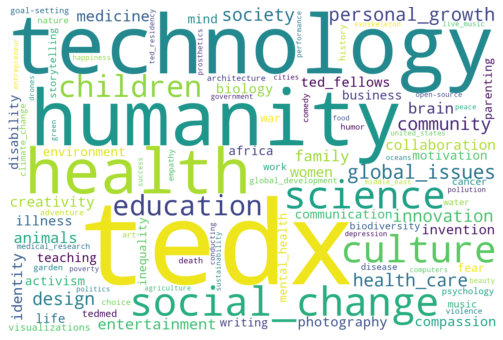

In [194]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      width=1500,
                      height=1000
                      ).generate_from_frequencies(freq_inspiring_topics)

plt.figure(figsize=(9,6))

plt.imshow(wordcloud, interpolation='bilinear')
# Note: interpolation makes the figure smoother
# different interpolation options are given here:
# https://matplotlib.org/gallery/images_contours_and_fields/interpolation_methods.html


plt.axis('off')
plt.show()